In [40]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [50]:
gt = plt.imread("Datasets/SOD/gt/8023.png")
print(gt.shape)
img1 = plt.imread("results/SOD/output/8023.jpg")
img1 = img1[:,:,0]
print(img1.shape)
print()
img2 = plt.imread("8023.png")
print(img2.shape)

(321, 481)
(321, 481)
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 2 2 ... 0 0 1]]
(321, 481)


In [49]:
mae1 = np.abs(gt - img1).mean()
mae2 = np.abs(gt - img2).mean()

print(mae1, mae2)

15.253956 0.016526788


In [10]:
feature

VGG(
  (features): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1,

In [13]:
dim_dict = {
    'densenet169': [64, 128, 256, 640, 1664],
    'vgg16': [64, 128, 256, 512, 512],
    'mobilenet2': [32, 24, 32, 64, 1280],
    'resnet101': [64, 256, 512, 1024, 2048]
}

dims = dim_dict[base][::-1]

In [15]:
preds = nn.ModuleList([nn.Conv2d(dims[0], 21, kernel_size=3, dilation=dl,
                                 padding=dl) for dl in [6, 12, 18, 24]])

In [16]:
preds

ModuleList(
  (0): Conv2d(512, 21, kernel_size=(3, 3), stride=(1, 1), padding=(6, 6), dilation=(6, 6))
  (1): Conv2d(512, 21, kernel_size=(3, 3), stride=(1, 1), padding=(12, 12), dilation=(12, 12))
  (2): Conv2d(512, 21, kernel_size=(3, 3), stride=(1, 1), padding=(18, 18), dilation=(18, 18))
  (3): Conv2d(512, 21, kernel_size=(3, 3), stride=(1, 1), padding=(24, 24), dilation=(24, 24))
)

In [17]:
upscale = nn.ModuleList([nn.ConvTranspose2d(512, 512, 4, 2, 1),
                         nn.ConvTranspose2d(512, 512, 16, 8, 4)])

In [18]:
upscale

ModuleList(
  (0): ConvTranspose2d(512, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ConvTranspose2d(512, 512, kernel_size=(16, 16), stride=(8, 8), padding=(4, 4))
)

In [1]:
import torch

In [2]:
x = torch.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [3]:
y = x + 2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [4]:
y.grad_fn

In [5]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [6]:
out.backward()

In [8]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [6]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    
print(y)

NameError: name 'torch' is not defined

In [1]:
import tensorflow as tf

In [3]:
a = tf.ones((2,2))
a

<tf.Tensor: id=5, shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [4]:
b = a + 2
b



<tf.Tensor: id=7, shape=(2, 2), dtype=float32, numpy=
array([[3., 3.],
       [3., 3.]], dtype=float32)>

In [6]:
c = b * b * 3
out2 = tf.reduce_mean(c)

print(c, out2)

tf.Tensor(
[[27. 27.]
 [27. 27.]], shape=(2, 2), dtype=float32) tf.Tensor(27.0, shape=(), dtype=float32)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from skimage.transform import resize

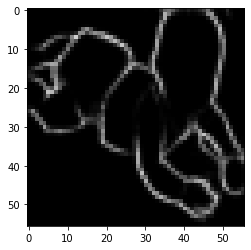

In [38]:
img = plt.imread("figure/contour_output_143_300.jpg")
# gt = plt.imshow(img, cmap="gray")
gt_2 = resize(img, (56, 56))*1.4
plt.imshow(gt_2, cmap='gray')
plt.imsave("gt_2.png", gt_2)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.transform import resize

In [39]:
img_dir = "/media/bronze9/14A225BEA225A568/sal_eval_toolbox/sal_eval_toolbox/tools/SaliencyMaps/DUTS-test/PiCANet/"
img_list = os.listdir(img_dir)
print(len(img_list))

5019


In [55]:
def make_heatmap(img_dir):
    img_list = os.listdir(img_dir)
    mean = np.zeros((224, 224, 3))
    for i, v in enumerate(img_list):
        if i % 1000 ==0:
            print(i)
        img = plt.imread(img_dir + img_list[i])
        img = resize(img, (224, 224, 3))
        mean += img
        
    return mean

In [69]:
picanet = make_heatmap(img_dir="/media/bronze9/14A225BEA225A568/sal_eval_toolbox/sal_eval_toolbox/tools/SaliencyMaps/ECSSD_data/SRM/")


0


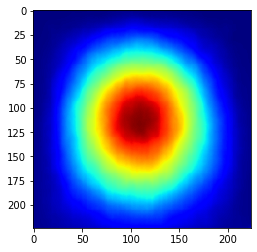

In [70]:
plt.imshow(picanet[:,:,0], cmap='jet')


In [71]:
ours = make_heatmap(img_dir="results/ECSSD/output/")

0


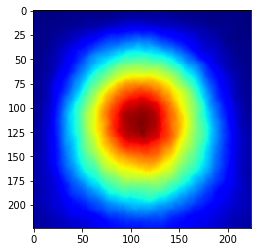

In [72]:
plt.imshow(ours[:,:,0], cmap='jet')


In [81]:
data = make_heatmap(img_dir="Datasets/HKU-IS/gt/")

0
1000
2000
3000
4000


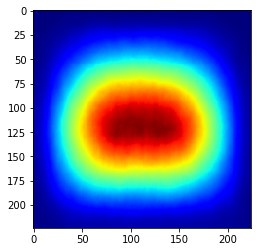

In [82]:
plt.imshow(data[:,:,0], cmap='jet')


In [67]:
np.sum(ours - picanet)

-1885643.3997988421